## KNN - K Nearest Neighbors

**Definição:** O algoritmo KNN é um algoritmo de classificação que procura e prevê similaridades baseados na distância euclidiana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv('diabetes.csv')
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


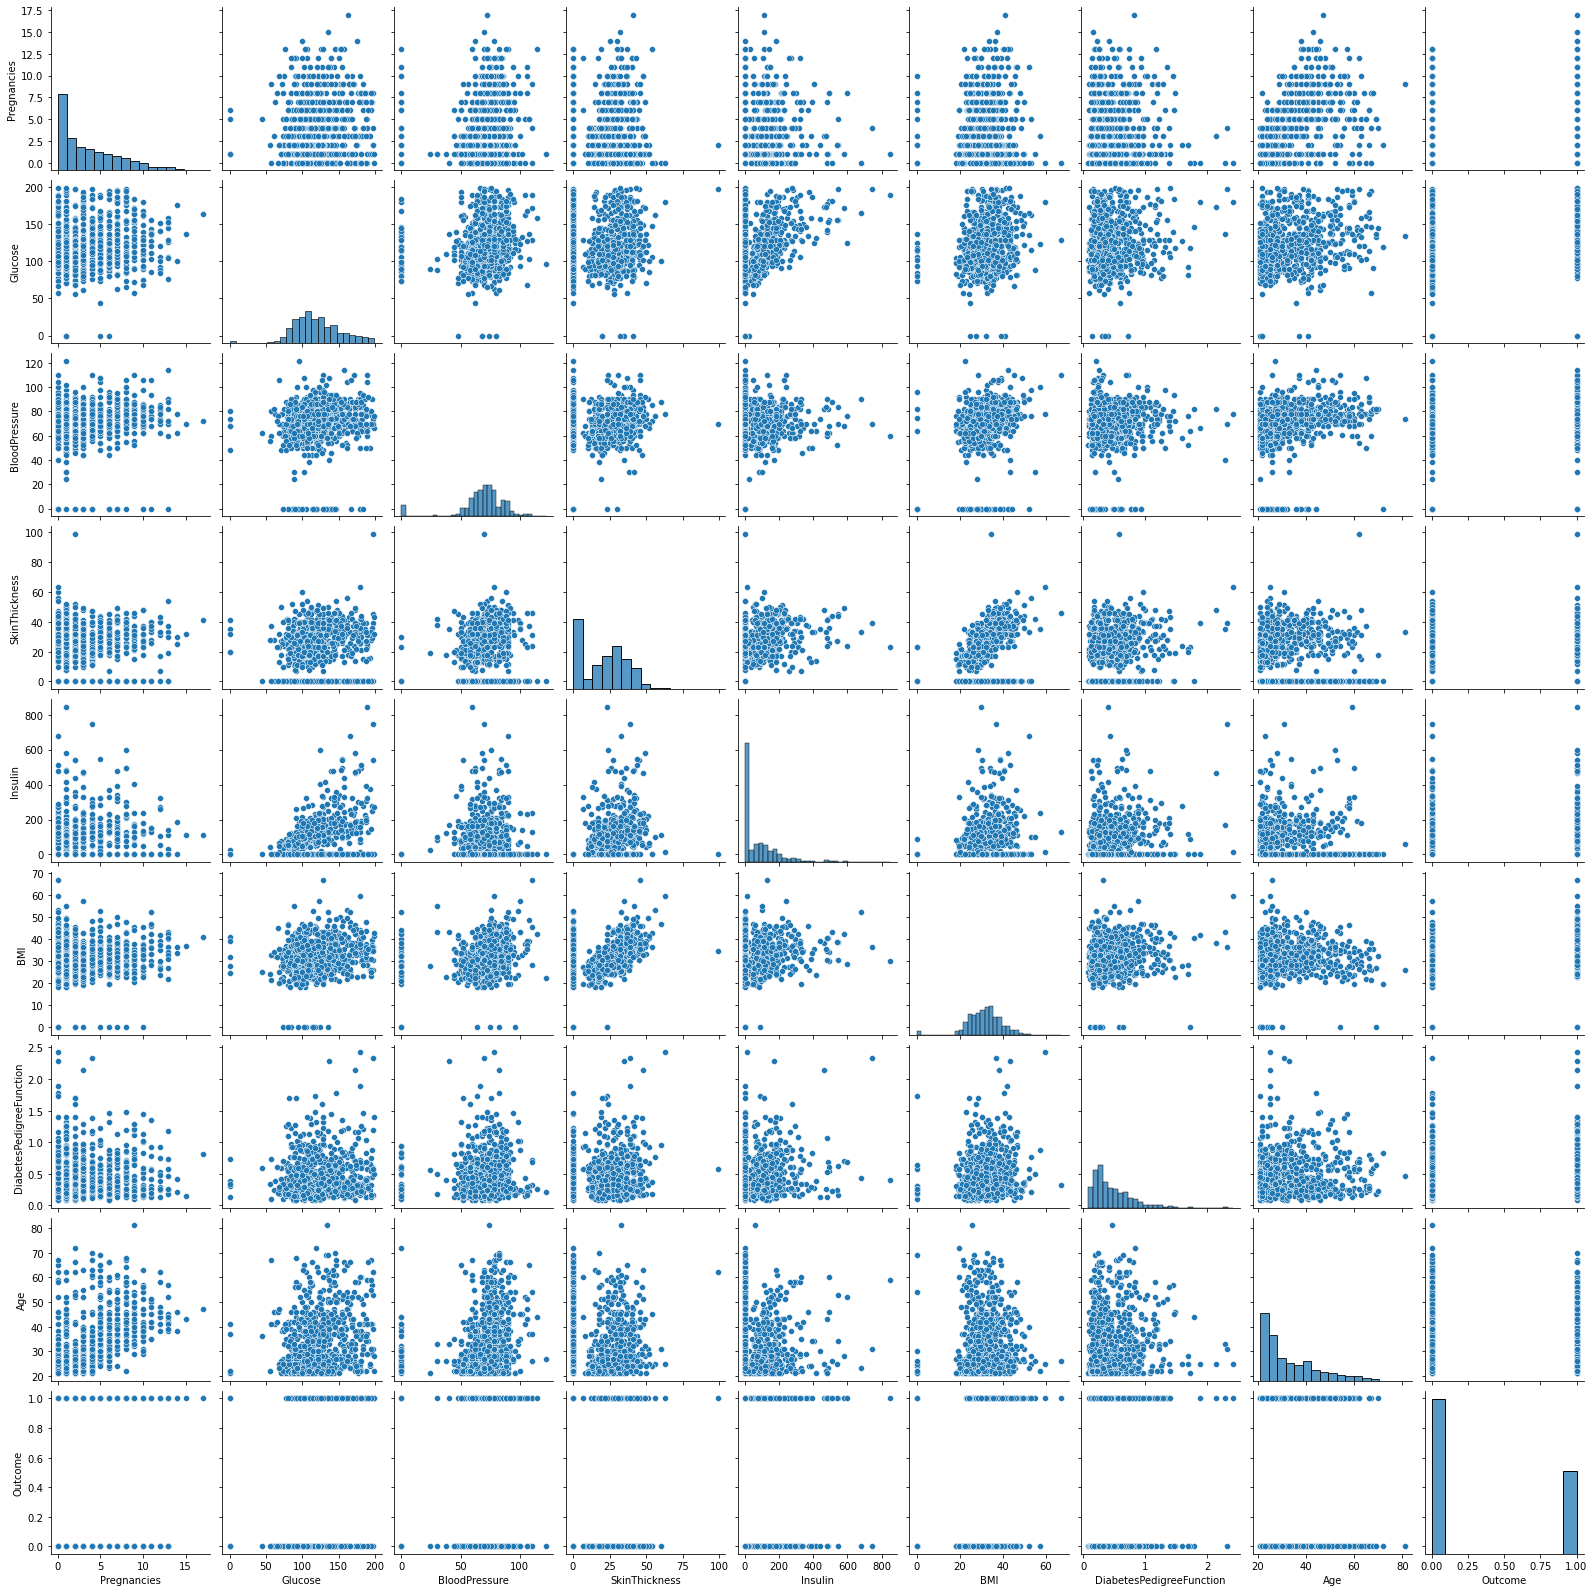

In [3]:
sns.pairplot(dados);

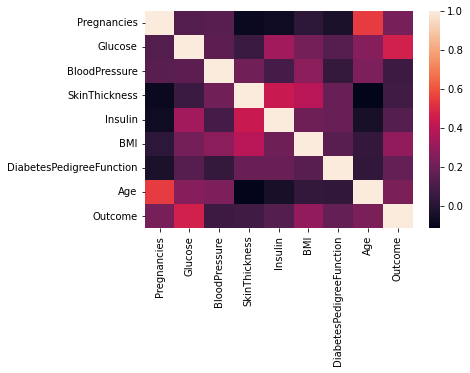

In [4]:
sns.heatmap(dados.corr());

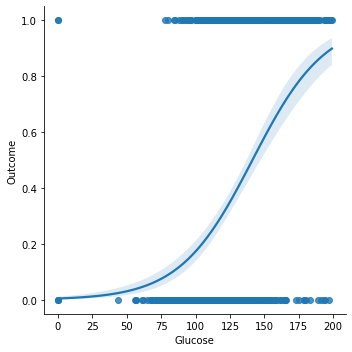

In [5]:
sns.lmplot(x='Glucose', y='Outcome', data=dados, logistic=True);

## Importando Normalizadores

**Normalização → MinimumMaxScaler:** Escala todos os números do df entre zero e um. Muito bom para redes neurais convolucionais

![imagem](https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg)

**Standardization → Z-Score → StandardScaler:** Passa todo os numeros do df para uma distribuição Gaussiana, e mede a diferença entre a média zero e o número de desvio padrões da média onde **µ (mi) = média da mostra, σ (sigma) = Desvio padrão da amostra**. Muito bom para modelos que usem distâncias euclidianas e métodos de gradiente (Gradient descent)

![imagem2](https://cdn-images-1.medium.com/max/512/1*Ap_7t_-luGSaAVgc7kl7qA.png)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
norm = dados.drop('Outcome', axis=1)

In [9]:
arr = scaler.fit_transform(norm)

In [10]:
dataframe = pd.DataFrame(arr, columns= dados.columns[:-1])
df = pd.concat([dataframe, dados.Outcome], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


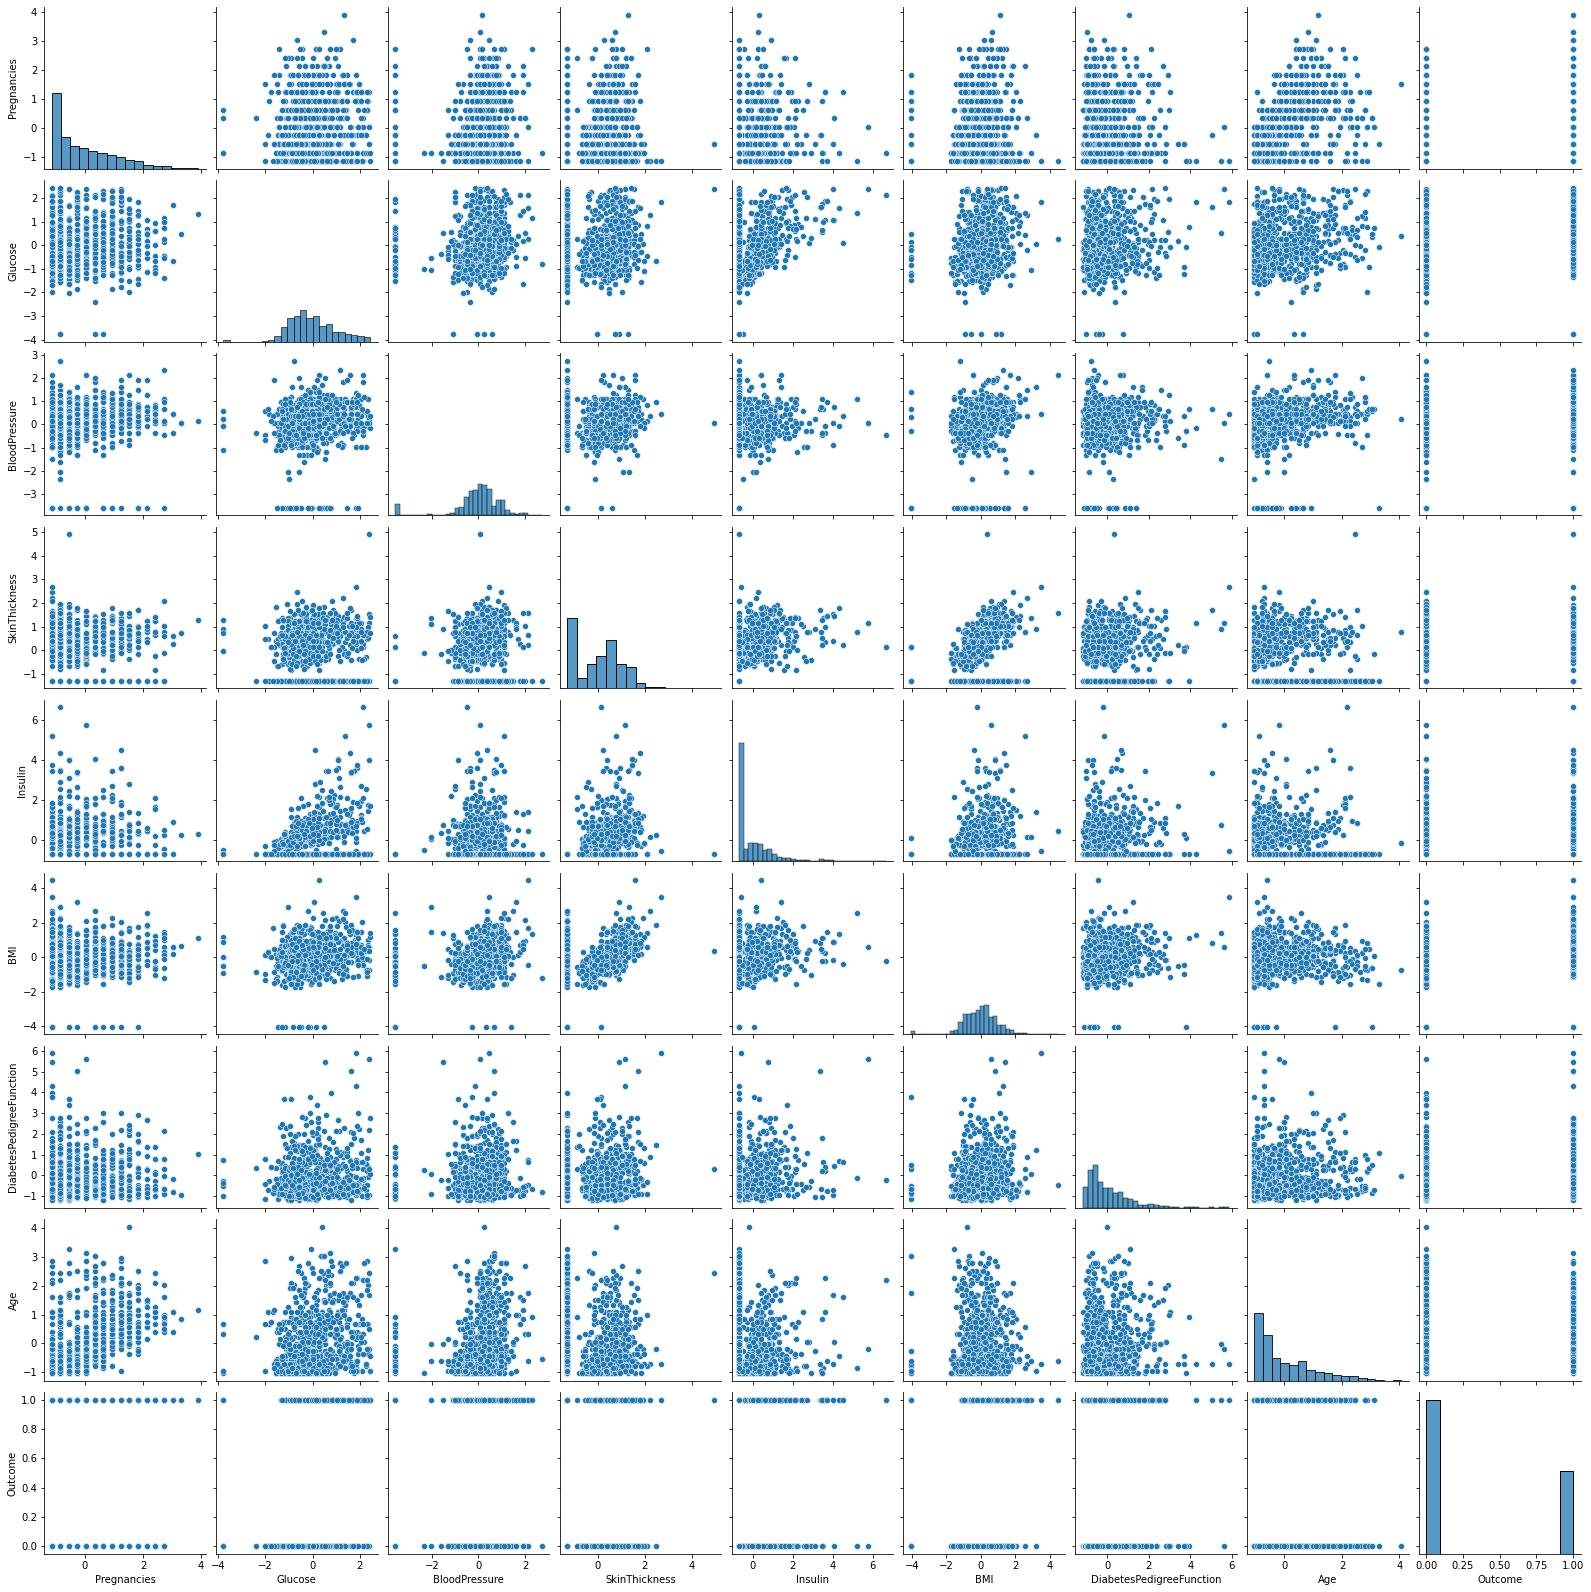

In [11]:
sns.pairplot(df);

In [12]:
X = df.drop('Outcome', axis=1)
y = df.Outcome

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

**Uma prática comum é passar o número de vizinhos como sendo a raíz quadrada do número do dataset, sendo sempre ímpar**

In [16]:
np.sqrt(len(df))

27.712812921102035

In [17]:
knn = KNeighborsClassifier(n_neighbors=21)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [19]:
y_pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.53      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [22]:
print(confusion_matrix(y_test, y_pred))

[[132  19]
 [ 38  42]]


## Encontrando o melhor valor para N Neighbors:

In [47]:
error_rate = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

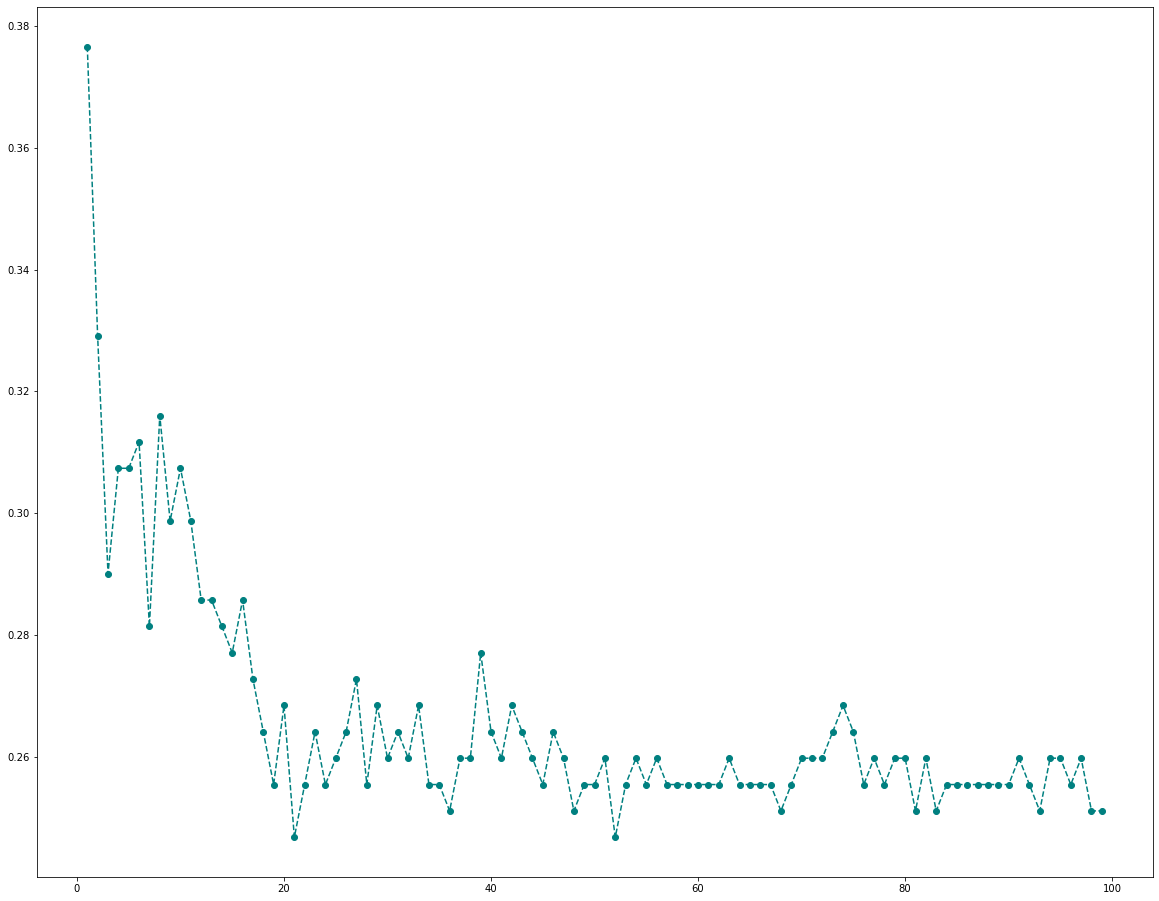

In [49]:
plt.figure(figsize=(20, 16))
plt.plot(range(1, 100), error_rate, ls='--', color='teal', marker='o');